# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #size should be 1500 in this and below
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#empty lists to store info
usedLats=[]
usedLngs=[]
maxTemp=[]
humidity=[]
cloudiness=[]
windSpeed=[]
country=[]
date=[]
usedCities=[]


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


print("Beginning Data Retrieval")
print("-------------------------------")

#iterate through each city
for city in cities:
    #send the request
    response = requests.get(query_url + city).json()
    #track record number
    recordNum=cities.index(city)+1    
    try: 
        #append info to corresponding list above
        usedLats.append(response['coord']['lat'])
        usedLngs.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])     
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        usedCities.append(city)
        
        #print to make it known it was successful
        print(f"Processing Record {recordNum} of Set 1 | {city}")
    except:
        #if unable to retrieve some info, show skipping message
        print(f"The city, {city}, was not found. Skipping...")    
        


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | nome
Processing Record 2 of Set 1 | libreville
Processing Record 3 of Set 1 | cromarty
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | kota kinabalu
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | mahendranagar
Processing Record 9 of Set 1 | aizawl
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | kinshasa
The city, amderma, was not found. Skipping...
Processing Record 16 of Set 1 | ketchikan
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | provideniya
Processing Record 22 of Set 1 | dauriya
Processing Record 23 of Set 1 

The city, marv dasht, was not found. Skipping...
Processing Record 194 of Set 1 | agarak
Processing Record 195 of Set 1 | hobart
Processing Record 196 of Set 1 | spornoye
Processing Record 197 of Set 1 | coquimbo
Processing Record 198 of Set 1 | matara
Processing Record 199 of Set 1 | chifeng
Processing Record 200 of Set 1 | victoria
Processing Record 201 of Set 1 | indi
Processing Record 202 of Set 1 | anadyr
Processing Record 203 of Set 1 | hasaki
Processing Record 204 of Set 1 | abha
Processing Record 205 of Set 1 | longyearbyen
Processing Record 206 of Set 1 | sumenep
Processing Record 207 of Set 1 | labuhan
Processing Record 208 of Set 1 | malinovskiy
Processing Record 209 of Set 1 | zhigansk
Processing Record 210 of Set 1 | kamskoye ustye
Processing Record 211 of Set 1 | mareeba
Processing Record 212 of Set 1 | jamestown
Processing Record 213 of Set 1 | kaitangata
Processing Record 214 of Set 1 | boguchany
Processing Record 215 of Set 1 | mumford
Processing Record 216 of Set 1 | 

Processing Record 384 of Set 1 | jinchang
Processing Record 385 of Set 1 | camacupa
Processing Record 386 of Set 1 | aquiraz
The city, toliary, was not found. Skipping...
Processing Record 388 of Set 1 | muzaffarabad
Processing Record 389 of Set 1 | rabat
Processing Record 390 of Set 1 | lompoc
Processing Record 391 of Set 1 | novoseleznevo
Processing Record 392 of Set 1 | nizwa
Processing Record 393 of Set 1 | riviere-au-renard
Processing Record 394 of Set 1 | shache
Processing Record 395 of Set 1 | takhatpur
Processing Record 396 of Set 1 | tarakan
Processing Record 397 of Set 1 | yerbogachen
The city, barawe, was not found. Skipping...
Processing Record 399 of Set 1 | yarada
Processing Record 400 of Set 1 | konotop
Processing Record 401 of Set 1 | tabas
Processing Record 402 of Set 1 | ponta delgada
The city, louisbourg, was not found. Skipping...
Processing Record 404 of Set 1 | kirensk
Processing Record 405 of Set 1 | broome
Processing Record 406 of Set 1 | pilar
Processing Record

Processing Record 576 of Set 1 | hambantota
Processing Record 577 of Set 1 | ngunguru
Processing Record 578 of Set 1 | fairmont
Processing Record 579 of Set 1 | along
Processing Record 580 of Set 1 | isugod
Processing Record 581 of Set 1 | santa maria
Processing Record 582 of Set 1 | mazyr
Processing Record 583 of Set 1 | vila velha
Processing Record 584 of Set 1 | asau
Processing Record 585 of Set 1 | antalaha
Processing Record 586 of Set 1 | chotila
Processing Record 587 of Set 1 | teahupoo
Processing Record 588 of Set 1 | revda
Processing Record 589 of Set 1 | curaca
Processing Record 590 of Set 1 | poum
Processing Record 591 of Set 1 | pietersburg
Processing Record 592 of Set 1 | mao
Processing Record 593 of Set 1 | baft
Processing Record 594 of Set 1 | biak
Processing Record 595 of Set 1 | namibe
Processing Record 596 of Set 1 | eldama ravine
Processing Record 597 of Set 1 | santa isabel do rio negro
The city, tillabery, was not found. Skipping...
Processing Record 599 of Set 1 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create data frame
weatherPy=pd.DataFrame({"City":usedCities,"Lat":usedLats,"Lng":usedLngs,"Max Temp":maxTemp,"Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":windSpeed,"Country":country,"Date":date})

#export to a CSV file
weatherPy.to_csv("Weather_Data.csv", encoding="utf-8", index=False)

weatherPy.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nome,64.50,-165.41,34.00,86,90,4.70,US,1603842620
1,libreville,0.39,9.45,77.00,100,75,4.70,GA,1603842702
2,cromarty,57.68,-4.03,44.01,100,100,3.36,GB,1603842703
3,punta arenas,-53.15,-70.92,46.40,61,0,16.11,CL,1603842703
4,kota kinabalu,5.97,116.07,77.00,78,20,5.82,MY,1603842703


In [5]:
#show all stats available for data frame
weatherPy.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.586797,18.791299,57.226744,75.411032,53.537367,7.172082,1.603843e+09
std,33.027392,90.392315,21.937137,19.155897,39.142177,5.348675,7.537149e+01
min,-54.800000,-179.170000,-11.920000,9.000000,0.000000,0.070000,1.603842e+09
25%,-6.045000,-64.565000,41.000000,67.000000,8.000000,3.420000,1.603843e+09
50%,22.915000,23.650000,62.150000,80.000000,67.000000,5.820000,1.603843e+09
75%,49.902500,93.427500,76.977500,89.000000,90.000000,9.170000,1.603843e+09
max,78.220000,179.320000,89.600000,100.000000,100.000000,31.090000,1.603843e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#upload from the CSV file
weatherPyCSV=pd.read_csv('Weather_Data.csv')
#sort value by humidity %
weatherPyCSV=weatherPyCSV.sort_values("Humidity", ascending=False).reset_index()
weatherPyCSV.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,99,la asuncion,11.03,-63.86,71.6,100,34,16.11,VE,1603842719
1,311,banepa,27.63,85.52,55.4,100,20,2.24,NP,1603842754
2,453,zadar,44.12,15.24,53.6,100,20,3.98,HR,1603842778
3,34,esperance,-33.87,121.90,62.6,100,64,10.29,AU,1603842708
4,436,lasa,46.62,10.70,41.0,100,13,2.80,IT,1603842775


In [7]:
#  Get the indices of cities that have humidity over 100%.
HumidityIndices=weatherPyCSV['City'].where(weatherPyCSV['Humidity'] > 100).to_frame(name='Humidity > 100')

indexList=HumidityIndices.index[HumidityIndices['Humidity > 100'].notnull()].tolist()


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if len(indexList)!=0:
    print(f"There are columns to drop: {indexList}")
    for x in indexList:
        cleanWeatherPy=WeatherPyCSV.drop(indexList , inplace=False)
else:
    print("There are no columns to drop")

There are no columns to drop


In [10]:
weatherPyCSV.head()


,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,99,la asuncion,11.03,-63.86,71.6,100,34,16.11,VE,1603842719
1,311,banepa,27.63,85.52,55.4,100,20,2.24,NP,1603842754
2,453,zadar,44.12,15.24,53.6,100,20,3.98,HR,1603842778
3,34,esperance,-33.87,121.90,62.6,100,64,10.29,AU,1603842708
4,436,lasa,46.62,10.70,41.0,100,13,2.80,IT,1603842775


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

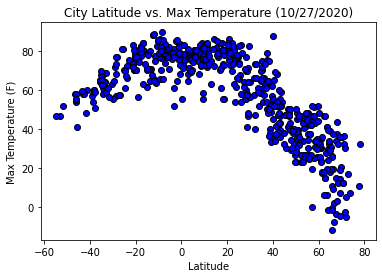

In [11]:
plt.title("City Latitude vs. Max Temperature (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

In [49]:
## The above scatter plot shows latitude in relation to the location's Max temperature. We can see that the northern hemisphere
## (to the right of 0 on the latitude line) gets colder the futher north you get. Conversely, the southern hemisphere gets
## colder the further south you get from the equator.

## Latitude vs. Humidity Plot

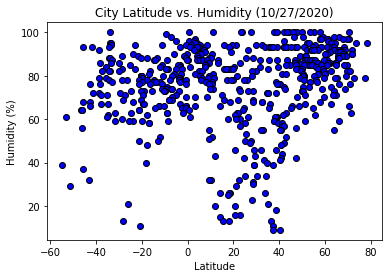

In [12]:
plt.title("City Latitude vs. Humidity (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Humidity"], marker="o", facecolors="blue", edgecolors="black")

In [ ]:
## The above scatter plot shows latitude in relation to the location's humidity. There's little correlation, but there does seem
## to be many (visually more than 3/4of the data set) that have humidity higher than 50%. These locations are spread fairly evenly
## between the northern and southern hemispheres.

## Latitude vs. Cloudiness Plot

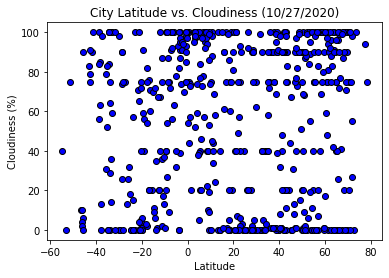

In [13]:
plt.title("City Latitude vs. Cloudiness (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

In [ ]:
## The above scatter plot show latitude in relation to cloudiness. There seems to be absolutely no relation between a location
## and the amount of cloudiness it received.

## Latitude vs. Wind Speed Plot

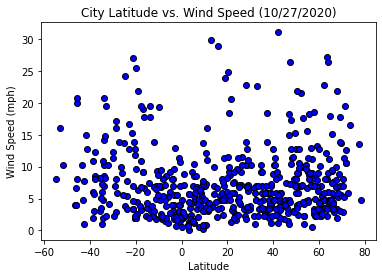

In [14]:
plt.title("City Latitude vs. Wind Speed (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

In [ ]:
## The above scatter plot shows latitude in relation to the locations wind speed (mph). There doesn't seem to be much relation
## for wind speed compared to location, however, visually it seems that more than 3/4 of the locations experience wind speeds of
## 15mph or less.

## Linear Regression

In [23]:
northernDF=weatherPyCSV[weatherPyCSV["Lat"]>=0]
southernDF=weatherPyCSV[weatherPyCSV["Lat"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8707601642792088


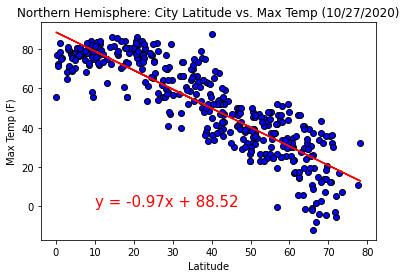

In [27]:
plt.title("Northern Hemisphere: City Latitude vs. Max Temp (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Max Temp"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7432330439125426


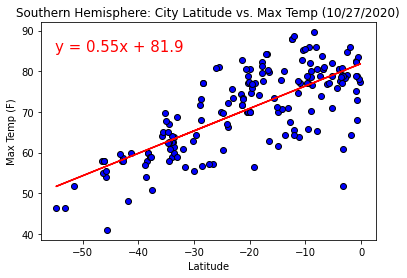

In [31]:
plt.title("Southern Hemisphere: City Latitude vs. Max Temp (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Max Temp"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.show()

In [ ]:
## The above two scatter plots show the norther and southern hemispheres, respectively, compared to the max temp in each location.
## There is a relatively strong relation for each hemisphere and it's max temps, where northern hemisphere locations get colder
## further north, while the southern hemisphere has colder temps further south.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24014518451347844


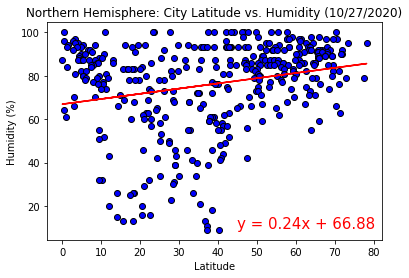

In [34]:
plt.title("Northern Hemisphere: City Latitude vs. Humidity (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Humidity"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20361149879155008


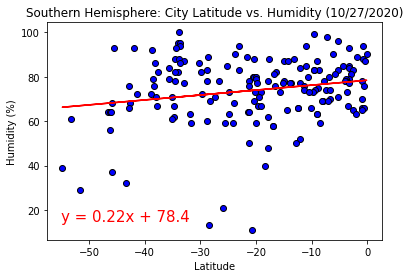

In [36]:
plt.title("Southern Hemisphere: City Latitude vs. Humidity (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Humidity"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.show()

In [ ]:
## The above two scatter plots show latitude vs humidity for both the northern and southern hemispheres. Neither hemisphere has
## a strong relation between the two, however, the southern hemisphere has  the vast majority of cities with humidity over 50%
## while the norther hemisphere has a lot more occurences of cities with humidity below 50% (however, the vast majority of  
## cities still have humidity over 50%).
 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05372245710220484


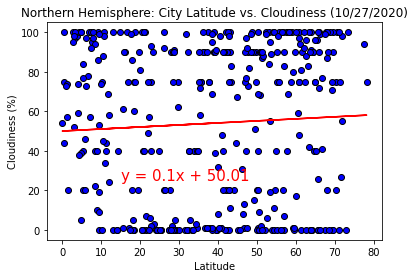

In [40]:
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Cloudiness"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(15,25),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20252375605488168


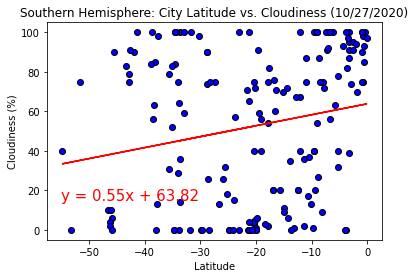

In [41]:
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Cloudiness"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.show()

In [ ]:
## The above two scatter plots show the relation between latitude and cloudiness for both the northern and southern hemispheres.
## There is little to no relationship between these two variables. The number of places with cloudiness greater than 50% seems 
## to be balanced with the number of places with cloudiness less than 50%, and both are spread evenly over all latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17156594577506806


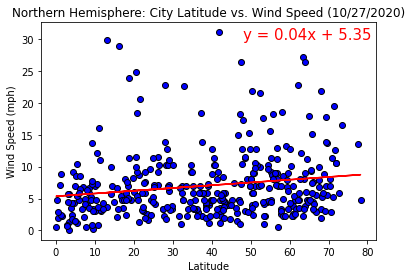

In [45]:
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Wind Speed"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(48,30),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.24756490741940138


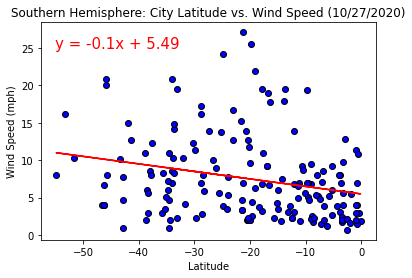

In [47]:
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Wind Speed"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.show()

In [ ]:
## The above two scatter plots show the relationship between latitude and wind speed for the nothern and southern hemispheres.
## There doesn't seem to be a huge relation between the two for the northern or southern hemispheres, however but have a majority
## of locations with wind speed of 15mph or less. 